<a href="https://colab.research.google.com/github/v195360/FSI/blob/master/Trabalho3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aprendizado supervisionado de classificação > rótulos


In [0]:
#importando bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

marvelvsdc = pd.read_csv("db.csv", encoding = "ISO-8859-1") #lendo CSV com pandas
marvelvsdc.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Original Title,Company,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA,Gross USA,Gross Worldwide
0,1,Iron Man,Marvel,7.9,79,126,2008,140000000,98618668,318604126,585366247
1,2,The Incredible Hulk,Marvel,6.7,61,112,2008,150000000,55414050,134806913,263427551
2,3,Iron Man 2,Marvel,7.0,57,124,2010,200000000,128122480,312433331,623933331
3,4,Thor,Marvel,7.0,57,115,2011,150000000,65723338,181030624,449326618
4,5,Captain America: The First Avenger,Marvel,6.9,66,124,2011,140000000,65058524,176654505,370569774


In [0]:
marvelvsdc.Company.unique()

array(['Marvel', 'DC'], dtype=object)

# **Roteiro**


Escolha uma classe de modelo importando do Scikit.

Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.

Organize os dados em uma feature matrix e um target array.

Ajuste o modelo invocando o método fit().

Aplique o modelo aos novos dados usando predict().





# **Naive Bayes**

In [0]:
from sklearn.naive_bayes import GaussianNB # 1. Escolha do modelo.
model_bayes = GaussianNB() #sem hiperparametro

In [0]:
# 3.1 Feature Matrix
X_marvelvsdc = marvelvsdc.loc[: ,  ["Rate",	"Metascore", "Minutes",	"Release", "Budget", "Opening Weekend USA"	] ]
X_marvelvsdc.head()

,Rate,Metascore,Minutes,Release,Budget,Opening Weekend USA
0,7.9,79,126,2008,140000000,98618668
1,6.7,61,112,2008,150000000,55414050
2,7.0,57,124,2010,200000000,128122480
3,7.0,57,115,2011,150000000,65723338
4,6.9,66,124,2011,140000000,65058524


In [0]:
# 3.2 Target Array
Y_marvelvsdc = marvelvsdc.Company
Y_marvelvsdc.head()


0    Marvel
1    Marvel
2    Marvel
3    Marvel
4    Marvel
Name: Company, dtype: object

In [0]:
# 3.3 Separação do Banco de Dados
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_marvelvsdc, Y_marvelvsdc, random_state=2020) #seed

In [0]:
# 4 Ajuste o modelo aos dados
model_bayes.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
# 5 Predições em dados novos
ymodel_bayes = model_bayes.predict(Xtest)

In [0]:
ymodel_bayes

array(['Marvel', 'DC', 'Marvel', 'Marvel', 'Marvel', 'Marvel', 'DC',
       'Marvel', 'Marvel', 'Marvel'], dtype='<U6')

In [0]:
ytest

13    Marvel
28        DC
21    Marvel
2     Marvel
15    Marvel
23        DC
38        DC
17    Marvel
22    Marvel
12    Marvel
Name: Company, dtype: object

In [0]:
#Acuracia
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model_bayes)

0.9

# Árvore de Decisão

In [0]:
from sklearn.tree import DecisionTreeClassifier  
model_decisiont = DecisionTreeClassifier()      
                                                    
model_decisiont.fit(Xtrain, ytrain)   

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# 5 Predições em dados novos
ymodel_decisiont = model_decisiont.predict(Xtest)

In [0]:
ymodel_decisiont

array(['Marvel', 'Marvel', 'DC', 'Marvel', 'Marvel', 'Marvel', 'Marvel',
       'DC', 'Marvel', 'Marvel'], dtype=object)

In [0]:
ytest

13    Marvel
28        DC
21    Marvel
2     Marvel
15    Marvel
23        DC
38        DC
17    Marvel
22    Marvel
12    Marvel
Name: Company, dtype: object

In [0]:
#Acuracia
accuracy_score(ytest, y_model_decisiont)

0.5

# **Matriz de Confusão**

# Nayve Bayes

In [0]:
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(ytest, y_model_bayes) 

Text(83.40000000000006, 0.5, 'Reais')

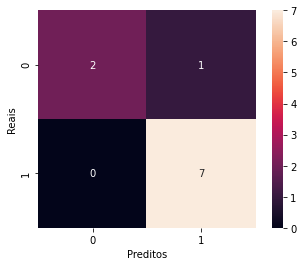

In [0]:

sns.heatmap(mat_bayes, square=True, annot = True)
plt.xlabel('Preditos')
plt.ylabel('Reais')

# Decision Tree

Text(83.40000000000006, 0.5, 'Reais')

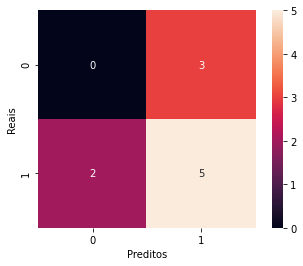

In [0]:
mat_decisiont = confusion_matrix(ytest, y_model_decisiont)
sns.heatmap(mat_decisiont, square=True, annot = True)
plt.xlabel('Preditos')
plt.ylabel('Reais')

# Cross-Validation

In [0]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier  #rouba a classificação de quem está perto
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, X_marvelvsdc, Y_marvelvsdc, cv = 5)

array([0.625     , 0.75      , 0.5       , 0.75      , 0.57142857])

In [0]:
model_bayes_cv = GaussianNB()                 # 2. Escolha dos hiperparâmetros e intanciação.
cross_val_score(model_bayes_cv, X_marvelvsdc, Y_marvelvsdc, cv = 5)

array([0.5       , 0.5       , 0.5       , 0.5       , 0.85714286])

## Leave one Out

In [0]:
from sklearn.model_selection import LeaveOneOut
score = cross_val_score(model_bayes_cv, X_marvelvsdc, Y_marvelvsdc, cv=LeaveOneOut())

In [0]:
score

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1.])

In [0]:
score.mean()

0.48717948717948717